<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_3_2)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_add_delta_-3.2_n250.csv',
 'data_add_delta_-3.2_n120.csv',
 'data_add_delta_-3.2_n60.csv',
 'data_add_delta_-3.2_n30.csv',
 'data_add_delta_-3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,43.157758,52.400846,63.255275,0.001917,168.815796,168.814262,0.001534
1,0.0,1.0,92.107152,60.975808,43.692088,-0.001967,206.773080,206.774762,-0.001682
2,0.0,2.0,79.086516,49.236926,47.957094,-0.001285,186.279252,186.280364,-0.001112
3,0.0,3.0,70.731426,86.944712,44.628664,-0.001246,212.303556,212.304969,-0.001412
4,0.0,4.0,34.185671,56.272738,82.793395,0.001385,183.253189,183.252410,0.000779
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,43.914762,34.896146,27.102592,-0.004308,115.909192,115.911196,-0.002004
29996,999.0,26.0,36.592745,36.594131,68.048311,0.001476,151.236662,151.234871,0.001791
29997,999.0,27.0,86.203301,61.617174,74.583789,0.000636,232.404900,232.405008,-0.000109
29998,999.0,28.0,84.034003,33.576461,72.741688,0.007158,200.359310,200.352378,0.006932


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,43.157758,52.400846,63.255275,0.001917,168.815796,168.814262,0.001534
1,0.0,1.0,92.107152,60.975808,43.692088,-0.001967,206.773080,206.774762,-0.001682
2,0.0,2.0,79.086516,49.236926,47.957094,-0.001285,186.279252,186.280364,-0.001112
3,0.0,3.0,70.731426,86.944712,44.628664,-0.001246,212.303556,212.304969,-0.001412
4,0.0,4.0,34.185671,56.272738,82.793395,0.001385,183.253189,183.252410,0.000779
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,43.914762,34.896146,27.102592,-0.004308,115.909192,115.911196,-0.002004
29996,999.0,26.0,36.592745,36.594131,68.048311,0.001476,151.236662,151.234871,0.001791
29997,999.0,27.0,86.203301,61.617174,74.583789,0.000636,232.404900,232.405008,-0.000109
29998,999.0,28.0,84.034003,33.576461,72.741688,0.007158,200.359310,200.352378,0.006932


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    43.157758  52.400846  63.255275  0.001917  168.815796   
      1.0    92.107152  60.975808  43.692088 -0.001967  206.773080   
      2.0    79.086516  49.236926  47.957094 -0.001285  186.279252   
      3.0    70.731426  86.944712  44.628664 -0.001246  212.303556   
      4.0    34.185671  56.272738  82.793395  0.001385  183.253189   
...                ...        ...        ...       ...         ...   
999.0 25.0   43.914762  34.896146  27.102592 -0.004308  115.909192   
      26.0   36.592745  36.594131  68.048311  0.001476  151.236662   
      27.0   86.203301  61.617174  74.583789  0.000636  232.404900   
      28.0   84.034003  33.576461  72.741688  0.007158  200.359310   
      29.0   89.452442  33.756729  56.589996 -0.001891  189.797276   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    168.814262  0.001534  
      1.0    206.774762 -0.001682  
      2.0    186.280364 -0.001112  
      3.0    212.304969 -0.001412  
      4.0    183.252410  0.000779  
...                 ...       ...  
999.0 25.0   115.911196 -0.002004  
      26.0   151.234871  0.001791  
      27.0   232.405008 -0.000109  
      28.0   200.352378  0.006932  
      29.0   189.798641 -0.001365  

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    43.157758  52.400846  63.255275  0.001917  168.815796   
      1.0    92.107152  60.975808  43.692088 -0.001967  206.773080   
      2.0    79.086516  49.236926  47.957094 -0.001285  186.279252   
      3.0    70.731426  86.944712  44.628664 -0.001246  212.303556   
      4.0    34.185671  56.272738  82.793395  0.001385  183.253189   
...                ...        ...        ...       ...         ...   
999.0 25.0   43.914762  34.896146  27.102592 -0.004308  115.909192   
      26.0   36.592745  36.594131  68.048311  0.001476  151.236662   
      27.0   86.203301  61.617174  74.583789  0.000636  232.404900   
      28.0   84.034003  33.576461  72.741688  0.007158  200.359310   
      29.0   89.452442  33.756729  56.589996 -0.001891  189.797276   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    168.814262  0.001534  
      1.0    206.774762 -0.001682  
      2.0    186.280364 -0.001112  
      3.0    212.304969 -0.001412  
      4.0    183.252410  0.000779  
...                 ...       ...  
999.0 25.0   115.911196 -0.002004  
      26.0   151.234871  0.001791  
      27.0   232.405008 -0.000109  
      28.0   200.352378  0.006932  
      29.0   189.798641 -0.001365  

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,43.157758,52.400846,63.255275,0.001917,168.815796,168.814262,0.001534
1,0.0,1.0,92.107152,60.975808,43.692088,-0.001967,206.773080,206.774762,-0.001682
2,0.0,2.0,79.086516,49.236926,47.957094,-0.001285,186.279252,186.280364,-0.001112
3,0.0,3.0,70.731426,86.944712,44.628664,-0.001246,212.303556,212.304969,-0.001412
4,0.0,4.0,34.185671,56.272738,82.793395,0.001385,183.253189,183.252410,0.000779
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,43.914762,34.896146,27.102592,-0.004308,115.909192,115.911196,-0.002004
29996,999.0,26.0,36.592745,36.594131,68.048311,0.001476,151.236662,151.234871,0.001791
29997,999.0,27.0,86.203301,61.617174,74.583789,0.000636,232.404900,232.405008,-0.000109
29998,999.0,28.0,84.034003,33.576461,72.741688,0.007158,200.359310,200.352378,0.006932


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    43.157758  52.400846  63.255275  0.001917  168.815796   
      1.0    92.107152  60.975808  43.692088 -0.001967  206.773080   
      2.0    79.086516  49.236926  47.957094 -0.001285  186.279252   
      3.0    70.731426  86.944712  44.628664 -0.001246  212.303556   
      4.0    34.185671  56.272738  82.793395  0.001385  183.253189   
...                ...        ...        ...       ...         ...   
999.0 25.0   43.914762  34.896146  27.102592 -0.004308  115.909192   
      26.0   36.592745  36.594131  68.048311  0.001476  151.236662   
      27.0   86.203301  61.617174  74.583789  0.000636  232.404900   
      28.0   84.034003  33.576461  72.741688  0.007158  200.359310   
      29.0   89.452442  33.756729  56.589996 -0.001891  189.797276   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    168.814262  0.001534  
      1.0    206.774762 -0.001682  
      2.0    186.280364 -0.001112  
      3.0    212.304969 -0.001412  
      4.0    183.252410  0.000779  
...                 ...       ...  
999.0 25.0   115.911196 -0.002004  
      26.0   151.234871  0.001791  
      27.0   232.405008 -0.000109  
      28.0   200.352378  0.006932  
      29.0   189.798641 -0.001365  

[30000 rows x 7 columns]

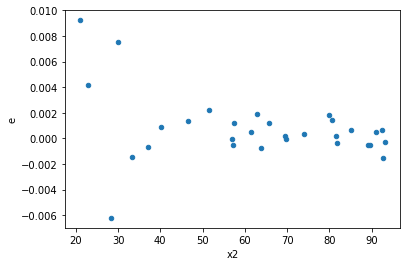

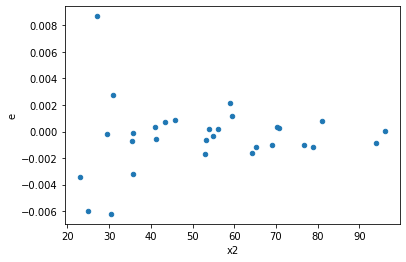

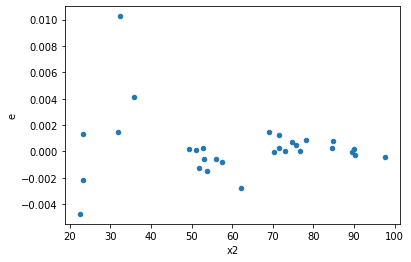

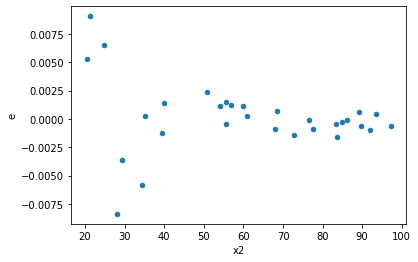

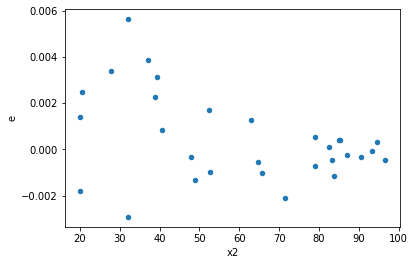

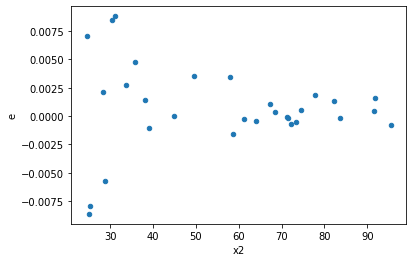

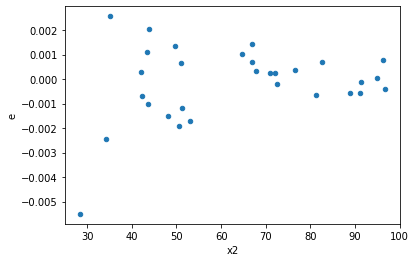

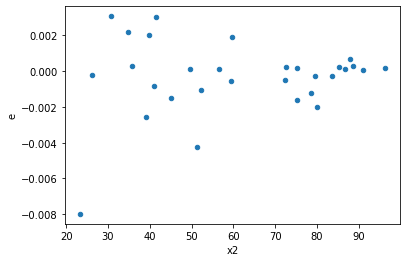

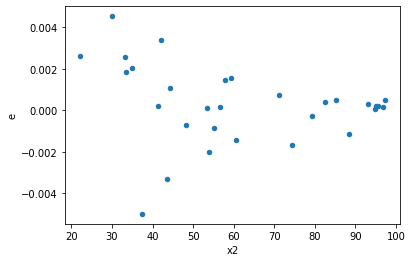

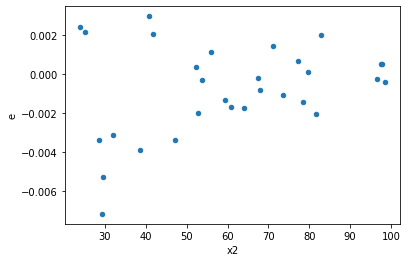

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
666.0,9.0,9.0,9.300473323114802e-06,1.058555877249532e-05,1.0333859247905336e-06,1.1761731969439244e-06,1.1381741987460625,0.8502759801157307,0.5748620099421347,0.42513799005786534,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,0.0003946903235550422,1.418940118987285e-05,4.385448039500469e-05,1.5766001322080943e-06,0.03595071969858932,3.235786498456128e-05,Reject005=0 : Heteroscedasticity
1.0,9.0,9.0,0.00013926605599095545,3.182632686050314e-06,1.547400622121727e-05,3.536258540055905e-07,0.022852895943696494,4.624927977974927e-06,Reject005=0 : Heteroscedasticity
2.0,9.0,9.0,9.724789187103007e-05,2.3593712731457406e-06,1.0805321319003342e-05,2.6215236368286007e-07,0.024261413052271953,5.992405625340808e-06,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,0.0002489884668001707,1.8359913057817618e-05,2.7665385200018963e-05,2.039990339757513e-06,0.07373800599588669,0.0006308836204821515,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,0.00017705821203184833,4.95803895913301e-06,1.967313467020537e-05,5.508932176814456e-07,0.02800231010037074,1.1123009859194602e-05,Reject005=0 : Heteroscedasticity
5.0,9.0,9.0,5.376341798420592e-05,2.7648577642375983e-06,5.973713109356214e-06,3.0720641824862205e-07,0.05142637629642205,0.0001453500558815898,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,5.434222603188575e-05,6.532928370945743e-06,6.038025114653972e-06,7.258809301050826e-07,0.12021826943770197,0.004178011484194504,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,2.2097841837683895e-05,6.79598569822004e-06,2.455315759742655e-06,7.551095220244489e-07,0.30754069778120635,0.0938508644146093,Reject005=1 : Homoscedasticity
8.0,9.0,9.0,0.00021912160096391068,1.7955552153570158e-06,2.434684455154563e-05,1.9950613503966843e-07,0.008194332313466182,5.090640767901705e-08,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    946
Reject005=1 : Homoscedasticity       54
Name: Result_test, dtype: int64